# Module 2: Exploration data analysis of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
data = p.read_csv("rain.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data.shape

(142193, 24)

In [5]:
df=data.dropna()

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.shape

(56420, 24)

In [8]:
p.crosstab(df.RISK_MM,df.RainTomorrow)

RainTomorrow,No,Yes
RISK_MM,,
0.0,36748,0
0.1,16,0
0.2,2996,0
0.3,11,0
0.4,1604,0
...,...,...
210.6,0,1
225.0,0,1
236.8,0,1


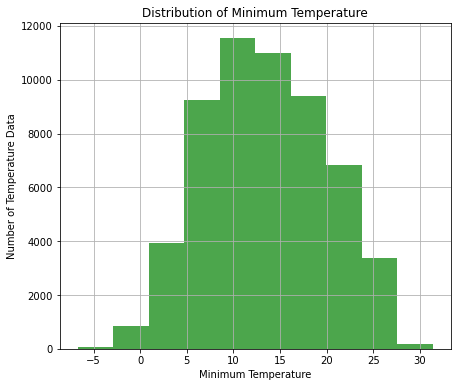

In [9]:
#Histogram Plot of Min temp distribution
df['MinTemp'].hist(figsize=(7,6), color='green', alpha=0.7)
plt.xlabel('Minimum Temperature')
plt.ylabel('Number of Temperature Data')
plt.title('Distribution of Minimum Temperature')
plt.show()

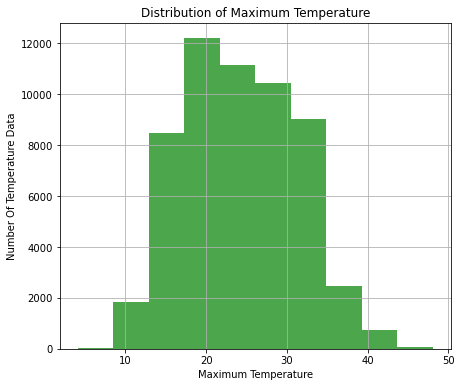

In [10]:
#Histogram Plot of Max temp distribution
df['MaxTemp'].hist(figsize=(7,6), color='green', alpha=0.7)
plt.xlabel('Maximum Temperature')
plt.ylabel('Number Of Temperature Data')
plt.title('Distribution of Maximum Temperature')
plt.show()

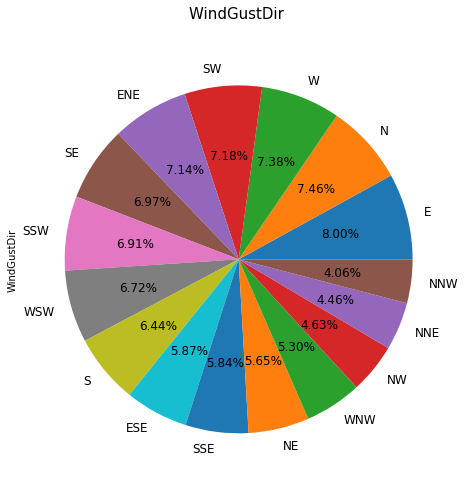

In [11]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'WindGustDir')
plt.show()

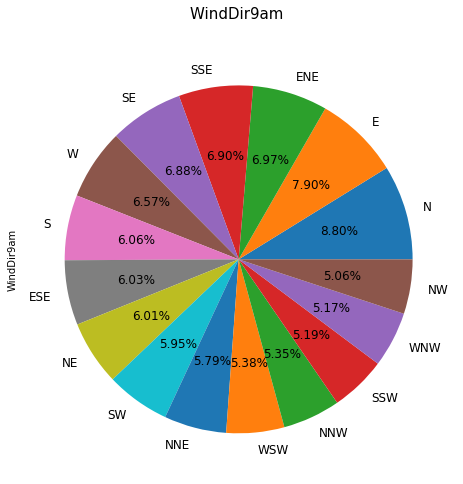

In [12]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(8,8), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' \n', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)
PropByVar(df, 'WindDir9am')
plt.show()

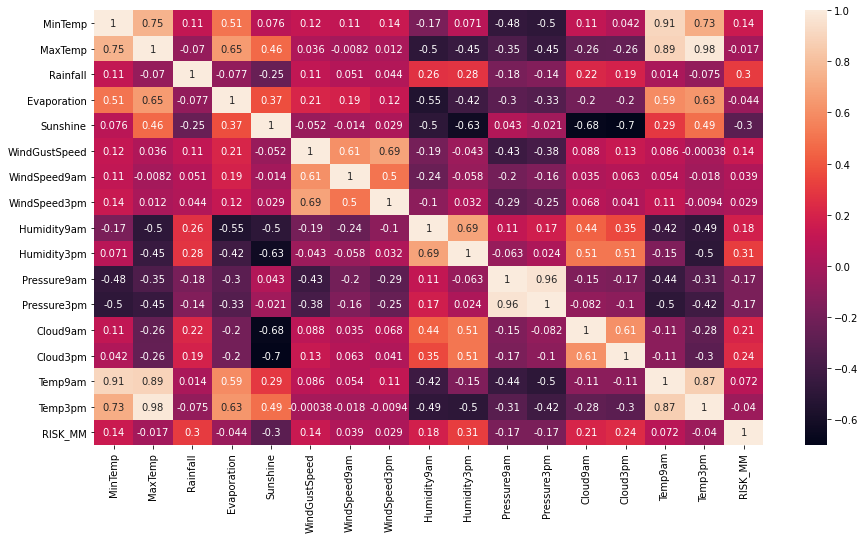

In [13]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,8))
s.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

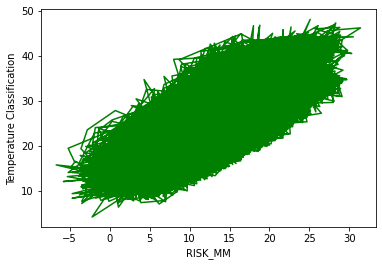

In [21]:
plt.plot(df['MinTemp'], df['MaxTemp'], color='g')
plt.xlabel('RISK_MM')
plt.ylabel('Temperature Classification')
plt.title('')
plt.show()

In [23]:
del df['Date']

In [28]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)


In [29]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,20,143,205,0,25,28,3,14,1,4,...,6,80,87,2,5,191,202,0,0,0
5940,20,149,136,0,47,36,14,7,2,2,...,79,153,173,1,1,121,131,0,0,0
5942,20,160,232,0,11,9,11,13,11,12,...,16,147,141,1,6,214,218,0,0,0
5943,20,187,241,0,18,27,6,4,6,7,...,16,151,140,1,5,218,227,0,0,0
5944,20,213,270,0,16,128,6,6,13,6,...,8,129,121,1,6,269,249,0,0,0
